# 사진준비하기

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib


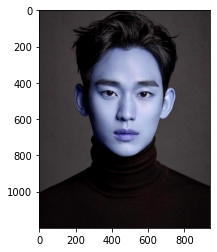

In [2]:
my_image_path = 'front.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)
plt.show()

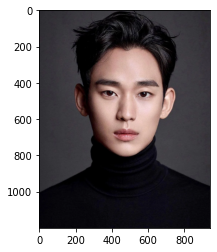

In [3]:
# plt.imshow 이전에 RGB 이미지로 바꾸기
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

# 얼굴 검출

In [4]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()

In [5]:
#detector_hog 를 이용해 bounding box를 추출합니다.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

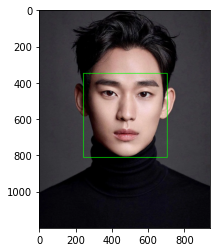

In [6]:
# 찾은 얼굴 영역 박스 리스트

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 얼굴 랜드마크

In [7]:
model_path = os.getenv('HOME')+'/aiffel/EX7/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [8]:
#landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환합니다.
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))


68


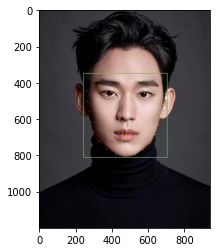

In [9]:
#직관적인 (x, y) 형태로 접근할 수 있도록 변환해 주었습니다. 
#따라서 list_points 는 tuple (x, y) 68개로 이루어진 리스트가 됩니다. 
#이미지에서 찾아진 얼굴 개수마다 반복하면 list_landmark에 68개의 랜드마크가 얼굴 개수만큼 저장됩니다.
#랜드마크를 영상에 출력해 보겠습니다.
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 스티커 적용하기

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(485, 579)
(x,y) : (485,347)
(w,h) : (463,463)


In [11]:
sticker_path = os.getenv('HOME')+'/aiffel/EX7/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)


(463, 463, 3)


In [12]:
refined_x = x-w//2
refined_y = y
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (254,347)


In [13]:
x_shape = img_sticker.shape[0]
y_shape = img_sticker.shape[1]
print('(x_shape,y_shape) : (%d,%d)'%(x_shape, y_shape))

sticker_area = img_show[refined_y:refined_y+x_shape, refined_x:refined_x+y_shape]
img_show[refined_y:refined_y+x_shape, refined_x:refined_x+y_shape] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)

(x_shape,y_shape) : (463,463)


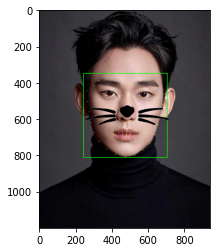

In [14]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

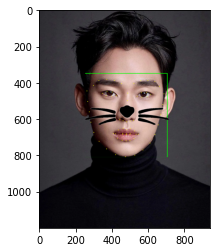

In [15]:
sticker_area = img_show[refined_y:refined_y+x_shape, refined_x:refined_x+y_shape]
img_bgr[refined_y:refined_y+x_shape, refined_x:refined_x+y_shape] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 얼굴이 기울어진 사진 1

# 사진불러오기

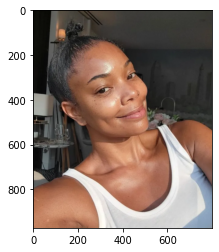

In [16]:
my_image_path = 'tilt3.png'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy() # OpenCV로 이미지를 불러옵니다
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

# 얼굴 검출

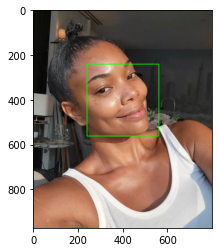

In [17]:
import dlib
detector_hog = dlib.get_frontal_face_detector()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 얼굴 랜드마크

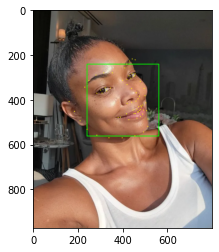

In [18]:
import os
model_path = os.getenv('HOME')+'/aiffel/EX7/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(landmark):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 스티커 적용하기

(461, 369)
352 341
이미지가 기울어진 각도: -47.45


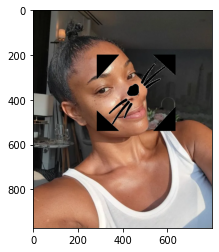

In [19]:
import math
for dlib_rect,landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]
    y = landmark[30][1]
    w = int(math.sqrt((x-landmark[36][0])**2 + (landmark[30][1]-landmark[36][1])**2)*2)
    h = int(math.sqrt((landmark[48][1]-landmark[2][1])**2 + (landmark[48][0]-landmark[2][0])**2)*2)
    print(w, h)
# 스티커 이미지를 불러와서 사이즈와 색상을 변경합니다.
sticker_path = 'cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)

# 스티커의 x좌표와, y좌표를 설정합니다. 
sticker_x = img_sticker.shape[0]
sticker_y = img_sticker.shape[1]

# 전체 이미지에서 스티커가 시작할 좌표를 설정합니다. 
refined_x = x-w//2
refined_y = y-h//2

# 스티커가 들어갈 영역입니다. 
sticker_area = img_bgr[refined_y:refined_y+sticker_x, refined_x:refined_x+sticker_y]

# 이미지에서 얼굴의 회전 각도를 구합니다. 
height, width, channel = img_sticker.shape
tan_theta = (landmark[30][0]-landmark[27][0])/(landmark[30][1]-landmark[27][1])
theta = np.arctan(tan_theta)
ang = theta *180/math.pi
print("이미지가 기울어진 각도:", -round(ang,2))

# 각도에 맞춰 스티커를 회전시킵니다.
# 시계 방향으로 기울어져 있기 때문에 -를 붙입니다. 
matrix = cv2.getRotationMatrix2D((width/2, height/2), ang, 1)
img_sticker = cv2.warpAffine(img_sticker, matrix, (width, height))

img_bgr[refined_y:refined_y+sticker_x, refined_x:refined_x+sticker_y] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 얼굴이 기울어진 사진 2

# 사진불러오기

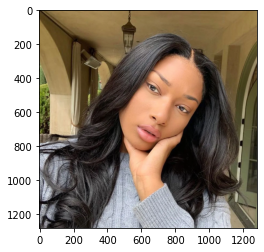

In [20]:
my_image_path = 'tilt2.png'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy() # OpenCV로 이미지를 불러옵니다
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

# 얼굴 검출

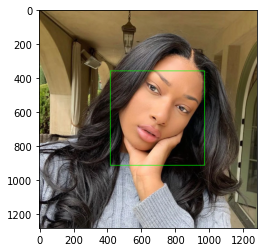

In [21]:
import dlib
detector_hog = dlib.get_frontal_face_detector()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 얼굴 랜드마크

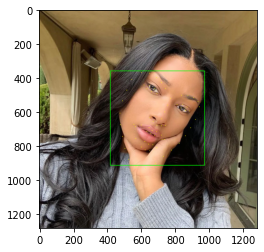

In [22]:
import os
model_path = os.getenv('HOME')+'/aiffel/EX7/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(landmark):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 스티커 적용하기

(720, 639)
449 306
이미지가 기울어진 각도: 23.26


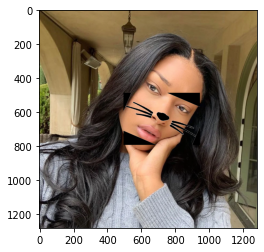

In [23]:
for dlib_rect,landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]
    y = landmark[30][1]
    w = int(math.sqrt((x-landmark[36][0])**2 + (landmark[30][1]-landmark[36][1])**2)*2)
    h = int(math.sqrt((landmark[48][1]-landmark[2][1])**2 + (landmark[48][0]-landmark[2][0])**2)*2)
    print(w, h)
# 스티커 이미지를 불러와서 사이즈와 색상을 변경합니다.
sticker_path = 'cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)

# 스티커의 x좌표와, y좌표를 설정합니다. 
sticker_x = img_sticker.shape[0]
sticker_y = img_sticker.shape[1]

# 전체 이미지에서 스티커가 시작할 좌표를 설정합니다. 
refined_x = x-w//2
refined_y = y-h//2

# 스티커가 들어갈 영역입니다. 
sticker_area = img_bgr[refined_y:refined_y+sticker_x, refined_x:refined_x+sticker_y]

# 이미지에서 얼굴의 회전 각도를 구합니다. 
height, width, channel = img_sticker.shape
tan_theta = (landmark[30][0]-landmark[27][0])/(landmark[30][1]-landmark[27][1])# 미간의 인덱스는 27입니다.
theta = np.arctan(tan_theta)
ang = theta *180/math.pi
print("이미지가 기울어진 각도:", -round(ang,2))

# 각도에 맞춰 스티커를 회전시킵니다.
# 시계 방향으로 기울어져 있기 때문에 -를 붙입니다. 
matrix = cv2.getRotationMatrix2D((width/2, height/2), ang, 1)
img_sticker = cv2.warpAffine(img_sticker, matrix, (width, height))

img_bgr[refined_y:refined_y+sticker_x, refined_x:refined_x+sticker_y] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 마무리

정면 사진의 경우 완성 사진에서 bounding box와 landmark 를 제거하고 최종 결과만 출력해야 하는데 bounding box의 일부분이 출력 되는 것을 볼 수 있습니다. 이유를 좀 더 알아봐야 할 것 같습니다.

측면 사진의 경우 코 좌표와 미간 좌표의 차와 arctan을 이용해 얼굴이 기울어진 각도를 알아내고,그 각도에 맞추어 스티커 사진도 회전해 주었습니다. 1번 사진과 2번 사진 다 기울어진 각도와 회전이 잘 되는 것 같습니다. 하지만 스티커를 출력할 때 sticker_area 영역과 스티커 모양이 맞지 않아 검은색 빈 공간이 생기게 됩니다. 이 문제도 해결방법을 생각해 봐야 할 것 같습니다.